---
# Gerando portfólios otimizados com a [FinQuant](https://pypi.org/project/FinQuant/)
---

**Instalando e importando bibliotecas**

---

In [ ]:
!pip install finquant

Por default, a FinQuant busca dados da Quandl(extinta) e Yahoo Finance.

Teremos que configurar para que a busca seja somente na Yahoo Finance (yfinance).

In [ ]:
from finquant.portfolio import build_portfolio              # submódulo para construção de portfólio
from finquant.moving_average import compute_ma, ema, sma    # submódulo para médias móveis
from finquant.moving_average import plot_bollinger_band     # submódulo para bandas de bollinger
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

**Construindo um portfílio**

---

In [ ]:
# criando lista de ativos para análise
ativos = ['^BVSP', 'VALE3.SA', 'PETR4.SA', 'WEGE3.SA', 'ABEV3.SA', 'HGLG11.SA']

# definindo variáveis com data de início e data final para coleta de dados
data_inicio = '2018-01-01'
data_fim = '2024-05-31'

In [ ]:
# estruturando portfólio e definindo coleta de dados pela yfinance
portfolio = build_portfolio(names = ativos,
                     start_date = data_inicio,
                     end_date = data_fim,
                     data_api = 'yfinance')

[*********************100%%**********************]  6 of 6 completed


In [ ]:
portfolio.data.head()

,^BVSP,VALE3.SA,PETR4.SA,WEGE3.SA,ABEV3.SA,HGLG11.SA
Date,,,,,,
2018-01-02,77891.0,26.179438,5.463502,8.740133,17.242149,103.784874
2018-01-03,77995.0,26.022562,5.513021,8.607389,17.281895,104.022705
2018-01-04,78647.0,26.129234,5.522925,8.523551,17.186502,104.101982
2018-01-05,79071.0,26.537111,5.555936,8.558484,17.250097,104.102776
2018-01-08,79379.0,27.126966,5.621961,8.628348,17.218300,104.102776


In [ ]:
# visualizando propriedades do portfólio sugerido pela biblioteca
portfolio.properties()

----------------------------------------------------------------------
Stocks: ^BVSP, VALE3.SA, PETR4.SA, WEGE3.SA, ABEV3.SA, HGLG11.SA
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.182
Portfolio Volatility: 0.223
Portfolio Downside Risk: 0.202
Portfolio Value at Risk: 0.549
Confidence level of Value at Risk: 95.00 %
Portfolio Sharpe Ratio: 0.793
Portfolio Sortino Ratio: 0.873

Skewness:
      ^BVSP  VALE3.SA  PETR4.SA  WEGE3.SA  ABEV3.SA  HGLG11.SA
0 -0.400879  0.045529  1.380394 -0.375406  0.394874  -0.459956

Kurtosis:
      ^BVSP  VALE3.SA  PETR4.SA  WEGE3.SA  ABEV3.SA  HGLG11.SA
0 -0.587374 -1.499266  0.880403 -1.514682  0.897083  -0.306223

Information:
  Allocation       Name
0   0.166667      ^BVSP
1   0.166667   VALE3.SA
2   0.166667   PETR4.SA
3   0.166667   WEGE3.SA
4   0.166667   ABEV3.SA
5   0.166667  HGLG11.SA
----------------------------------------------------------------------


**Skewness:** Distorção do histograma de distribuição dos retornos.

**Kurtosis:** Achatamento do histograma de distribuição dos retornos.

Como não definimos **alocação**, foi adotado o mesmo peso para todos os ativos.

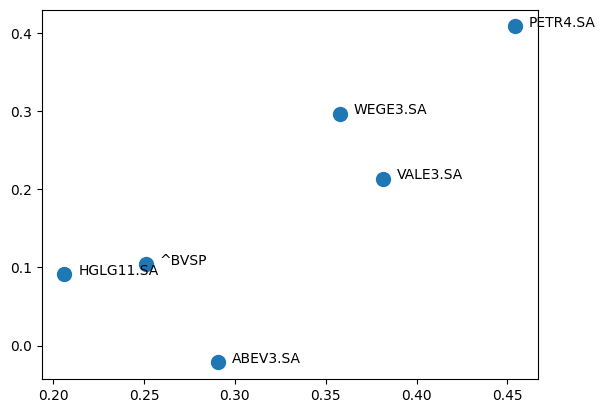

In [ ]:
# visualização gráfica do portfólio
portfolio.plot_stocks()

Matriz de **Risco X Retorno** (por padrão da biblioteca os eixos não vem discriminados).

<Axes: xlabel='Date'>

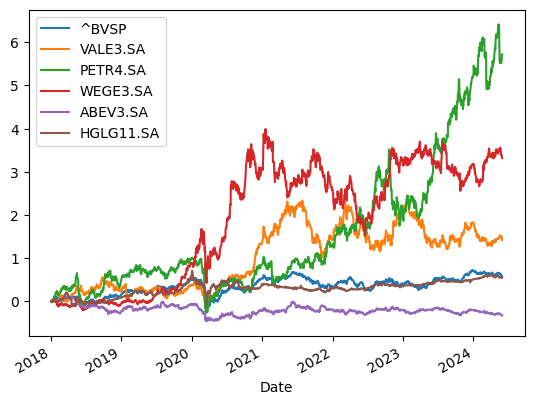

In [ ]:
# visualização gráfica dos retornos acumulados dos ativo
portfolio.comp_cumulative_returns().plot()

O gráfico é gerado com os dados normalizados, ou seja, o valor de retorno dos ativos inicia em zero e vai sendo atualizado conforme a performance individual de cada ativo.

**Indicadores de análise técnica**

---

Médias móveis:

In [ ]:
# selecionando um dos ativos do portfólio para trabalhar
petr = portfolio.get_stock('PETR4.SA').data

In [ ]:
# lista com 3 valores para posterior definição das médias móveis
janela_medias = [10, 50, 100]

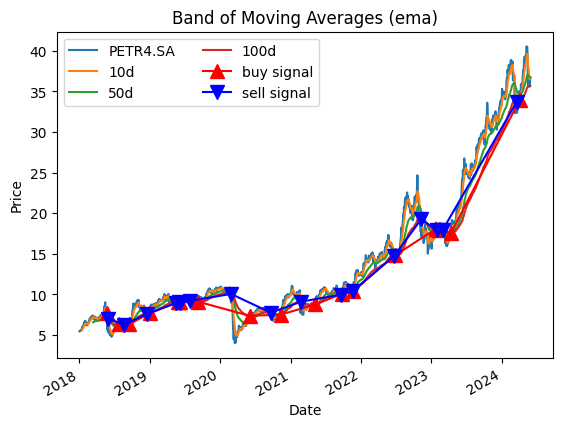

In [ ]:
# definindo as médias móveis exponenciais
medias_moveis = compute_ma(petr, ema, janela_medias, plot = True)

Bandas de Bollinger:

In [ ]:
# definindo peso das bandas
janela_bb = 20

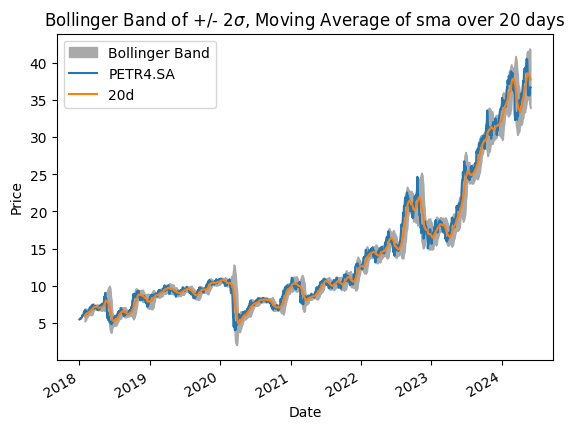

In [ ]:
plot_bollinger_band(petr, sma, janela_bb)

**Fronteira Eficiente**

---

**Método Monte Carlo:** Testa aleatoriamente várias combinações de portfólio, alterando o peso de alocação de cada ativo listado e medindo o efeito disso na relação Risco X Retorno.

**Min Volatility:** Composição de portfólio com mínima volatilidade.

**Max Sharpe Ratio:** Composição de portfólio com melhor Sharp Ratio.


In [ ]:
# gerando otimização com 10 mil iterações do método de Monte Carlo
otm_min, otm_res = portfolio.mc_optimisation(num_trials = 10000)

In [ ]:
# composição otimizada da carteira (pesos)
otm_min

,^BVSP,VALE3.SA,PETR4.SA,WEGE3.SA,ABEV3.SA,HGLG11.SA
Min Volatility,0.139592,0.051142,0.042626,0.051211,0.123577,0.591853
Max Sharpe Ratio,0.000570,0.076536,0.315487,0.383994,0.025639,0.197774


In [ ]:
# resultados dessa carteira otimizada
otm_res

,Expected Return,Volatility,Sharpe Ratio
Min Volatility,0.109162,0.174403,0.597247
Max Sharpe Ratio,0.276363,0.257883,1.052272


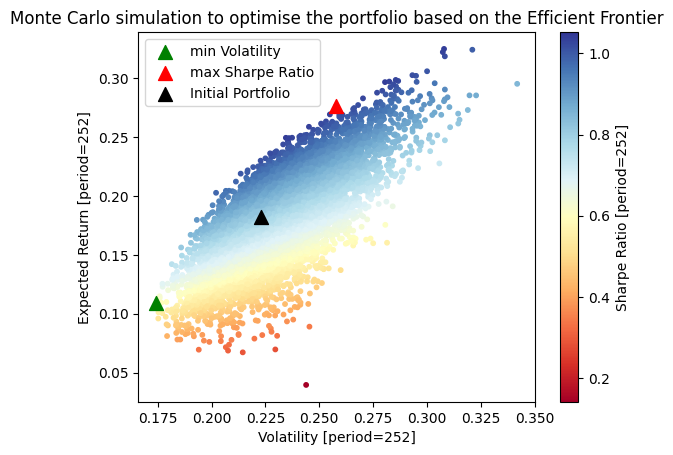

In [ ]:
# visualização gráfica da distribuição dos portfólios testados no Monte Carlo
portfolio.mc_plot_results()

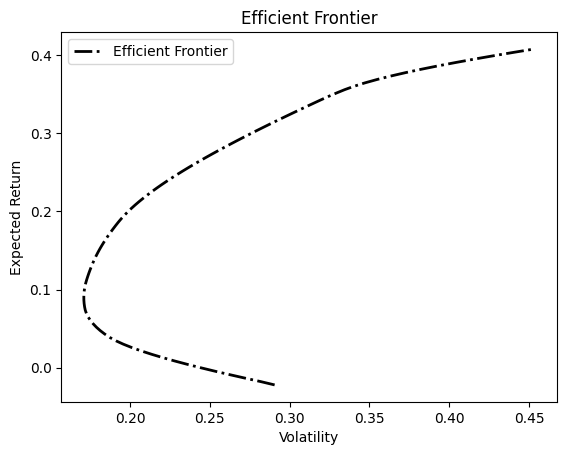

In [ ]:
# plotagem da fronteira eficiente
portfolio.ef_plot_efrontier()

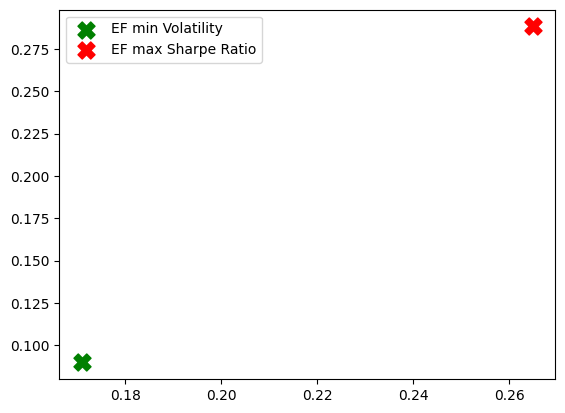

In [ ]:
# plotagem dos portfólios ótimos
portfolio.ef_plot_optimal_portfolios()

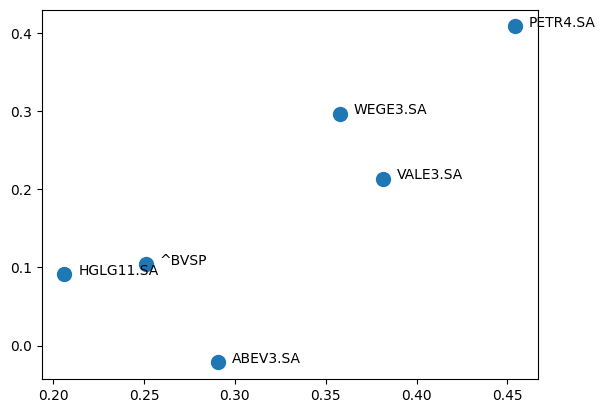

In [ ]:
# plotagem dos ativos isoladamente
portfolio.plot_stocks()

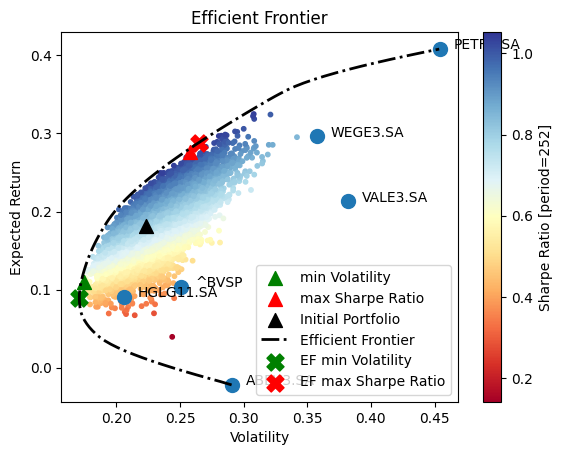

In [ ]:
# unindo todas as plotagens
portfolio.mc_plot_results()
portfolio.ef_plot_efrontier()
portfolio.ef_plot_optimal_portfolios()
portfolio.plot_stocks()

# exportando figura finalizada
plt.savefig('fronteira_eficiente.png')